<a href="https://colab.research.google.com/github/pumpzcc/EvolutionaryDeepLearning/blob/main/EDL_8_2_Evo_Autoencoder_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and other setup

In [1]:
import numpy as np
import tensorflow as tf
import numpy as np
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.callbacks import EarlyStopping

from IPython import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
plt.gray()

<Figure size 640x480 with 0 Axes>

CONSTANTS

Load Fashion Data

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# split dataset
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Setup class names and labels for visualization, not training

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Plot some images.

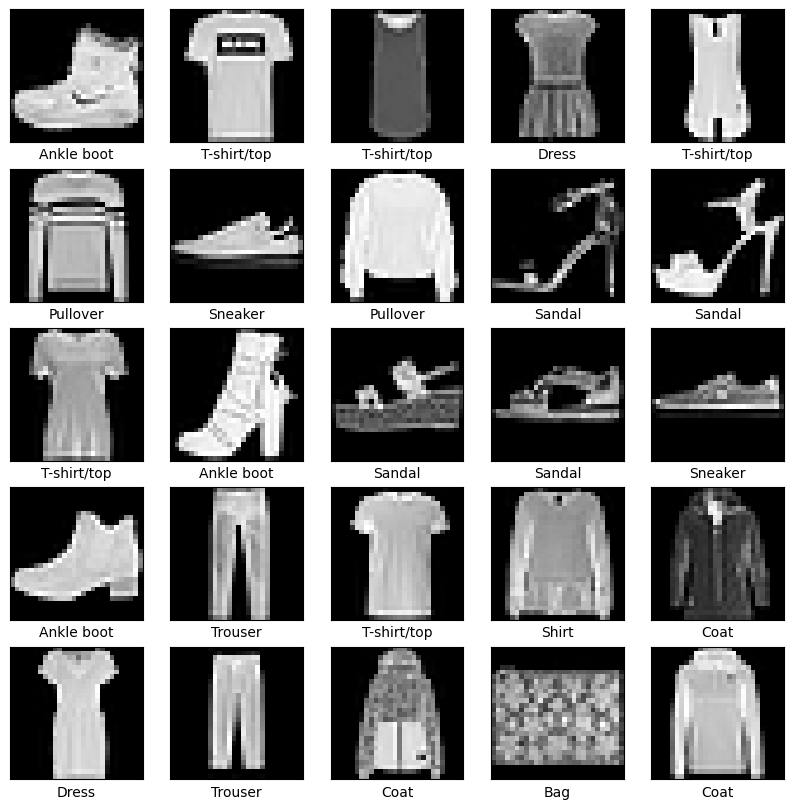

In [4]:
import math

def plot_data(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])
  plt.show()

plot_data(25, train_images, train_labels)


STAGE 1: Auto-encoders

Build the Encoder

In [5]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer3)

Build the Decoder

In [6]:
#decoding architecture
decoded_layer1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = layers.UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = layers.UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = layers.Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = layers.UpSampling2D((2, 2))(decoded_layer3)
#output layer
output_layer   = layers.Conv2D(1, (3, 3), padding='same')(decoded_layer3)

Build the Model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,761 (194.38 KB)

 Trainable params: 49,761 (194.38 KB)

 Non-trainable params: 0 (0.00 B)

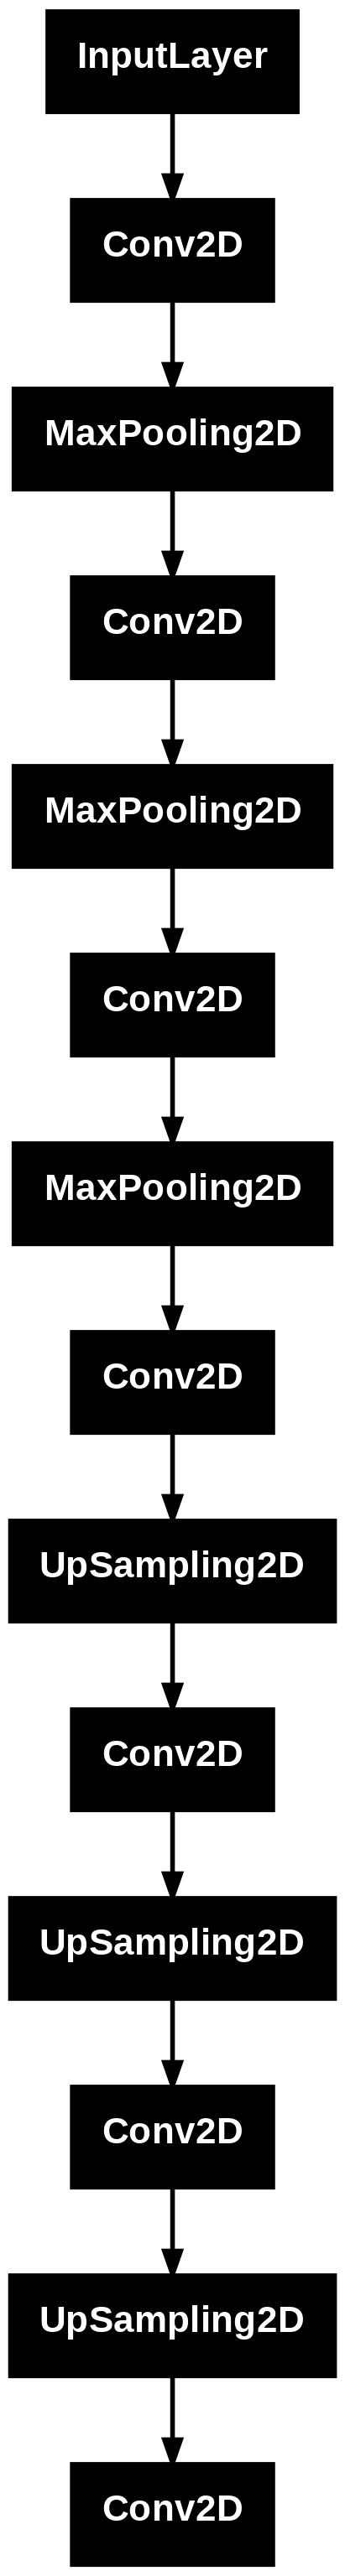

In [7]:
# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model)

In [8]:
history_loss = []
history_val_loss = []

def add_history(history):
  history_loss.append(history.history["loss"])
  history_val_loss.append(history.history["val_loss"])

def reset_history():
  global history_loss
  global history_val_loss
  history_loss = []
  history_val_loss = []
  return []

def plot_results(num_images, images, labels, history):
  add_history(history)
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])
  plt.show()
  plt.plot(history_loss, label='loss')
  plt.plot(history_val_loss, label='val_loss')
  plt.legend()
  plt.show()

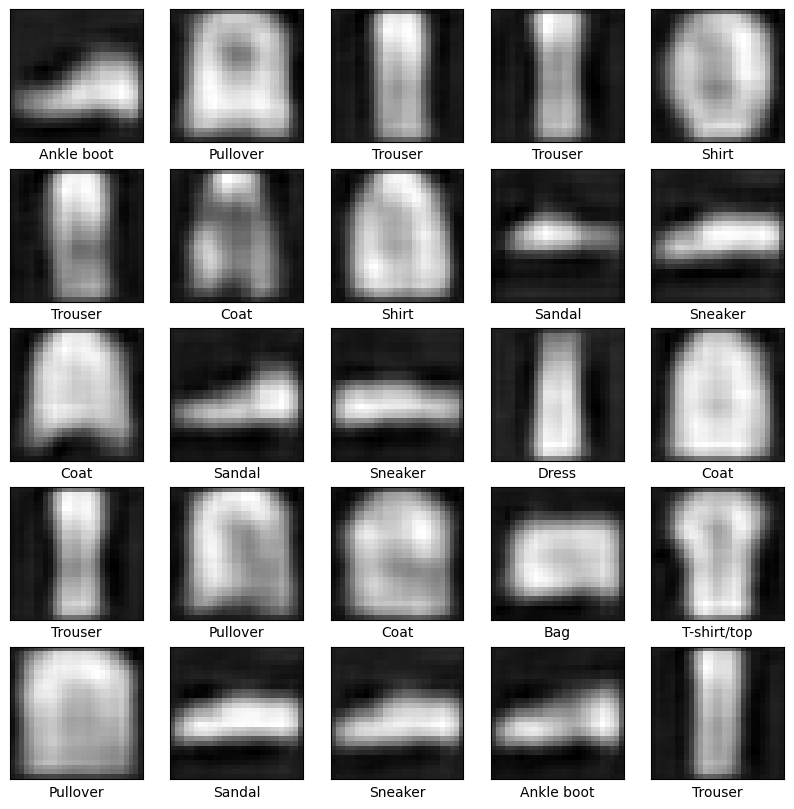

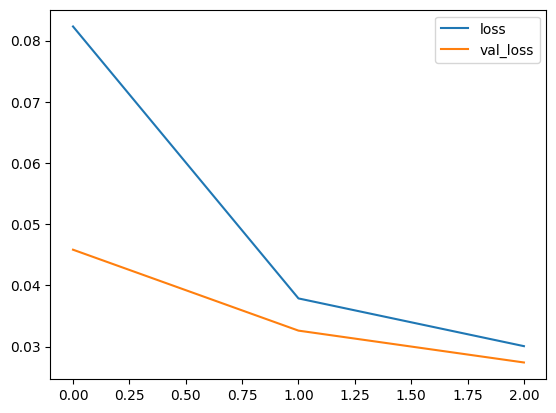

In [9]:
EPOCHS = 3
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,761 (194.38 KB)

 Trainable params: 49,761 (194.38 KB)

 Non-trainable params: 0 (0.00 B)

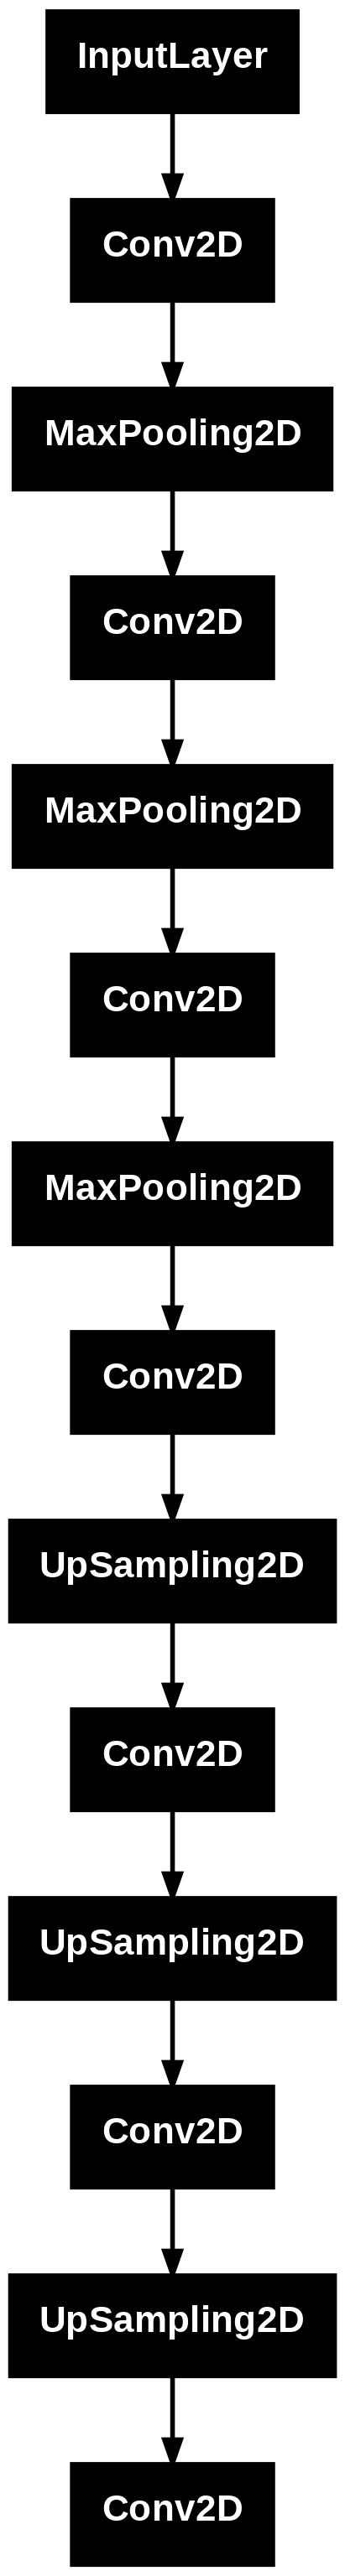

In [10]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)

#decoding architecture
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
#output layer
output_layer   = layers.Conv2D(1, (3, 3), padding='same')(x)

# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model)

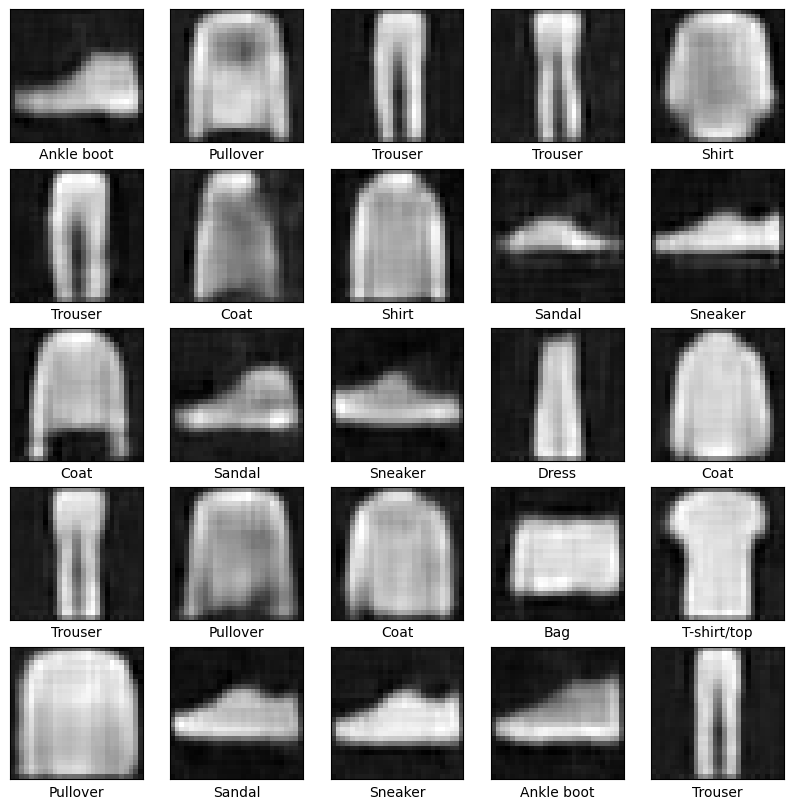

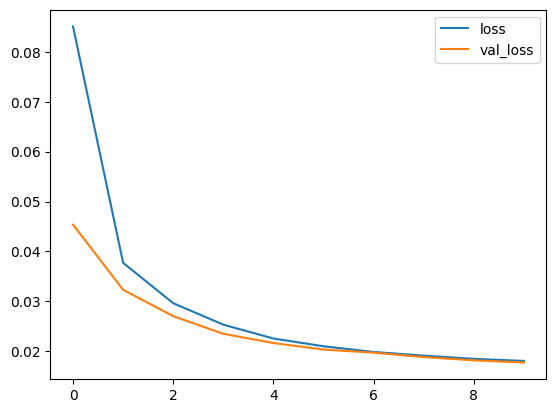

In [11]:
EPOCHS = 10
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)

# Encoding an Autoencoder

In [12]:
#@title Constants
max_layers = 10
max_neurons = 128
min_neurons = 16
max_kernel = 3
min_kernel = 3
max_pool = 2
min_pool = 2

CONV_LAYER = -1
CONV_LAYER_LEN = 4
BN_LAYER = -3
BN_LAYER_LEN = 1
DROPOUT_LAYER = -4
DROPOUT_LAYER_LEN = 2
UPCONV_LAYER = -2
UPCONV_LAYER_LEN = 4

In [13]:
#@title Encoding scheme
def generate_neurons():
  return random.randint(min_neurons, max_neurons)

def generate_kernel():
  part = []
  part.append(random.randint(min_kernel, max_kernel))
  part.append(random.randint(min_kernel, max_kernel))
  return part

def generate_bn_layer():
  part = [BN_LAYER]
  return part

def generate_dropout_layer():
  part = [DROPOUT_LAYER]
  part.append(random.uniform(0,.5))
  return part

def generate_conv_layer():
  part = [CONV_LAYER]
  part.append(generate_neurons())
  part.extend(generate_kernel())
  return part

def generate_upconv_layer():
  part = [UPCONV_LAYER]
  part.append(generate_neurons())
  part.extend(generate_kernel())
  return part

def create_offspring():
  ind = []
  layers = 0
  for i in range(max_layers):
    if i==0: #first layer always convolutational
      ind.extend(generate_conv_layer())
      layers += 1
    elif random.uniform(0,1)<.5:
      #add convolution layer
      ind.extend(generate_conv_layer())
      layers += 1
      if random.uniform(0,1)<.5:
        #add batchnormalization
        ind.extend(generate_bn_layer())
      if random.uniform(0,1) < .5:
        ind.extend(generate_dropout_layer())
  for i in range(layers):
    ind.extend(generate_upconv_layer())
    if random.uniform(0,1)<.5:
      #add batchnormalization
      ind.extend(generate_bn_layer())
    if random.uniform(0,1) < .5:
      ind.extend(generate_dropout_layer())
  return ind

individual = create_offspring()
print(individual)

[-1, 128, 3, 3, -1, 27, 3, 3, -3, -1, 35, 3, 3, -3, -4, 0.029000738379406144, -1, 105, 3, 3, -4, 0.005720006907369235, -1, 37, 3, 3, -4, 0.0710968413759202, -1, 47, 3, 3, -3, -4, 0.0034768516473648314, -1, 17, 3, 3, -3, -4, 0.09703054693899316, -2, 80, 3, 3, -3, -4, 0.34196251882446177, -2, 22, 3, 3, -2, 36, 3, 3, -3, -4, 0.04620851054470326, -2, 89, 3, 3, -3, -2, 16, 3, 3, -3, -2, 104, 3, 3, -2, 39, 3, 3, -3]


In [14]:
def padding(gene):
  return "same" if gene == 1 else "valid"

def build_model(individual):
  input_layer = Input(shape=(28, 28, 1))
  il = len(individual)
  i = 0
  x = input_layer
  while i < il:
    if individual[i] == CONV_LAYER:
      pad="same"
      n = individual[i+1]
      k = (individual[i+2], individual[i+3])
      i += CONV_LAYER_LEN
      x = layers.Conv2D(n, k, activation='relu', padding=pad)(x)
      if x.shape[1] > 7:
        x = layers.MaxPool2D( (2, 2), padding='same')(x)
    elif individual[i] == BN_LAYER: #add batchnormal layer
      x = layers.BatchNormalization()(x)
      i += BN_LAYER_LEN
    elif individual[i] == DROPOUT_LAYER: #add dropout layer
      x = layers.Dropout(individual[i+1])(x)
      i += DROPOUT_LAYER_LEN
    elif individual[i] == UPCONV_LAYER:
      pad="same"
      n = individual[i+1]
      k = (individual[i+2], individual[i+3])
      x = layers.Conv2D(n, k, activation='relu', padding=pad)(x)
      x = layers.UpSampling2D((2, 2))(x)
      i += CONV_LAYER_LEN
      if x.shape[1] == (28):
        break #model is complete
    else:
      break
  if x.shape[1] == 14:
    x = layers.UpSampling2D((2, 2))(x)

  output_layer = layers.Conv2D(1, (3, 3), padding='same')(x)
  model = Model(input_layer, output_layer)
  model.compile(optimizer='adam', loss='mse')
  return model

model = build_model(individual)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 27)     │        31,131 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 27)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 27)       │           108 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 35)       │         8,540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 35)       │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 35)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 105)      │        33,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 105)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 37)       │        35,002 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 37)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 47)       │        15,698 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 47)       │           188 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 47)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 17)       │         7,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 17)       │            68 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 17)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 80)       │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 14, 14, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 80)     │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 161,244 (629.86 KB)

 Trainable params: 160,832 (628.25 KB)

 Non-trainable params: 412 (1.61 KB)

In [15]:
max_model = None
min_model = None
maxp = 0
minp = 10000000

for i in range(100):
  individual = create_offspring()
  model = build_model(individual)
  p = model.count_params()
  if p > maxp:
    maxp = p
    max_model = model
  if p < minp:
    minp = p
    min_model = model

max_model.summary(line_length=100)
min_model.summary(line_length=100)

Model: "functional_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_100 (InputLayer)               │ (None, 28, 28, 1)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_857 (Conv2D)                        │ (None, 28, 28, 113)             │             1,130 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_202 (MaxPooling2D)           │ (None, 14, 14, 113)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_858 (Conv2D)                        │ (None, 14, 14, 61)              │            62,098 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_203 (MaxPooling2D)           │ (None, 7, 7, 61)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_285                    │ (None, 7, 7, 61)                │               244 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_859 (Conv2D)                        │ (None, 7, 7, 66)                │            36,300 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_279 (Dropout)                      │ (None, 7, 7, 66)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_860 (Conv2D)                        │ (None, 7, 7, 120)               │            71,400 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_286                    │ (None, 7, 7, 120)               │               480 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_280 (Dropout)                      │ (None, 7, 7, 120)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_861 (Conv2D)                        │ (None, 7, 7, 120)               │           129,720 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_281 (Dropout)                      │ (None, 7, 7, 120)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_862 (Conv2D)                        │ (None, 7, 7, 116)               │           125,396 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_863 (Conv2D)                        │ (None, 7, 7, 103)               │           107,635 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_864 (Conv2D)                        │ (None, 7, 7, 108)               │           100,224 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ up_sampling2d_202 (UpSampling2D)           │ (None, 14, 14, 108)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_287                    │ (None, 14, 14,

 Total params: 686,124 (2.62 MB)

 Trainable params: 685,546 (2.62 MB)

 Non-trainable params: 578 (2.26 KB)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)                │ (None, 28, 28, 1)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_124 (Conv2D)                        │ (None, 28, 28, 33)              │               330 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_32 (MaxPooling2D)            │ (None, 14, 14, 33)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_125 (Conv2D)                        │ (None, 14, 14, 55)              │            16,390 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_33 (MaxPooling2D)            │ (None, 7, 7, 55)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_33 (Dropout)                       │ (None, 7, 7, 55)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_126 (Conv2D)                        │ (None, 7, 7, 57)                │            28,272 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_34 (Dropout)                       │ (None, 7, 7, 57)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_127 (Conv2D)                        │ (None, 7, 7, 47)                │            24,158 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ up_sampling2d_32 (UpSampling2D)            │ (None, 14, 14, 47)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_41                     │ (None, 14, 14, 47)              │               188 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_128 (Conv2D)                        │ (None, 14, 14, 23)              │             9,752 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ up_sampling2d_33 (UpSampling2D)            │ (None, 28, 28, 23)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_129 (Conv2D)                        │ (None, 28, 28, 1)               │               208 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 79,298 (309.76 KB)

 Trainable params: 79,204 (309.39 KB)

 Non-trainable params: 94 (376.00 B)

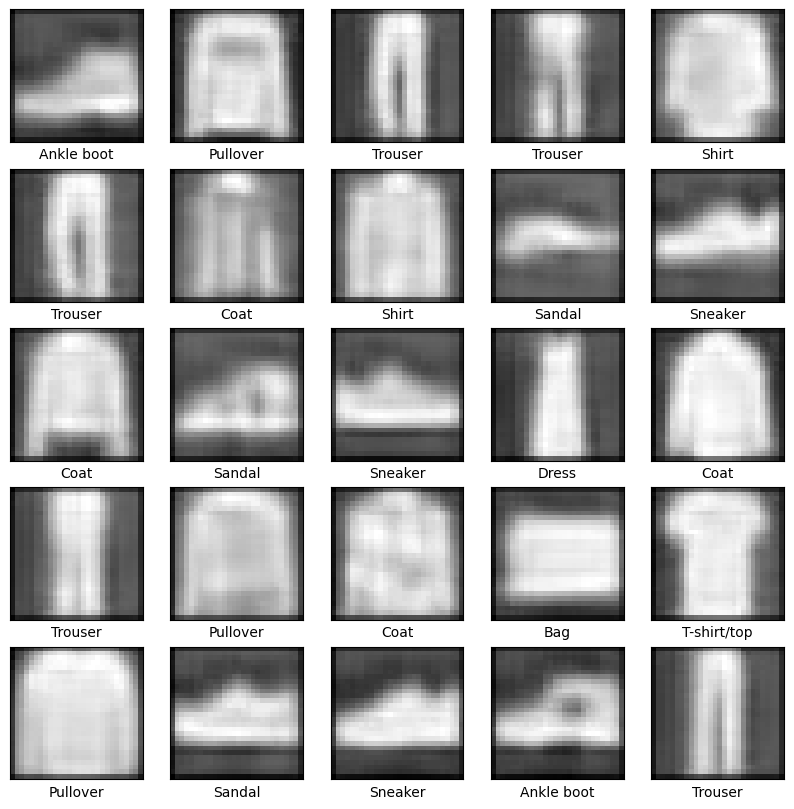

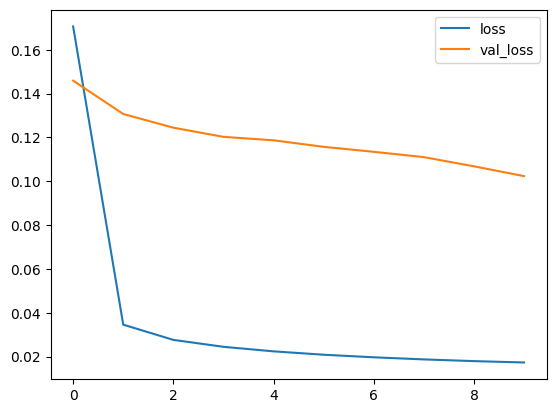

In [16]:
EPOCHS = 10
history = reset_history()

#model = max_model
model = min_model

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)